In [1]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
data = pd.read_csv("HK/listings.csv")

In [3]:
# output the basic info
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12569 entries, 0 to 12568
Data columns (total 16 columns):
id                                12569 non-null int64
name                              12560 non-null object
host_id                           12569 non-null int64
host_name                         12568 non-null object
neighbourhood_group               0 non-null float64
neighbourhood                     12569 non-null object
latitude                          12569 non-null float64
longitude                         12569 non-null float64
room_type                         12569 non-null object
price                             12569 non-null int64
minimum_nights                    12569 non-null int64
number_of_reviews                 12569 non-null int64
last_review                       8855 non-null object
reviews_per_month                 8855 non-null float64
calculated_host_listings_count    12569 non-null int64
availability_365                  12569 non-null int64
dtyp

In [4]:
data.isnull().sum()

id                                    0
name                                  9
host_id                               0
host_name                             1
neighbourhood_group               12569
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                        3714
reviews_per_month                  3714
calculated_host_listings_count        0
availability_365                      0
dtype: int64

In [5]:
data = data.drop(['neighbourhood_group','last_review', 'reviews_per_month', 'host_name', 'name'], axis=1)
data.isnull().sum()

id                                0
host_id                           0
neighbourhood                     0
latitude                          0
longitude                         0
room_type                         0
price                             0
minimum_nights                    0
number_of_reviews                 0
calculated_host_listings_count    0
availability_365                  0
dtype: int64

In [7]:
data.describe()


,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,calculated_host_listings_count,availability_365
count,1.251000e+04,1.251000e+04,12510.000000,12510.000000,12510.000000,12510.000000,12510.000000,12510.000000,12510.000000
mean,2.323507e+07,8.479130e+07,22.304617,114.159825,801.291607,6.361950,20.949480,34.449001,157.898401
std,1.011013e+07,8.002399e+07,0.049749,0.045538,1869.510377,11.197695,42.890377,97.095003,143.160182
min,6.907400e+04,5.556000e+03,22.158560,113.856700,47.000000,1.000000,0.000000,1.000000,0.000000
25%,1.611075e+07,1.718778e+07,22.281852,114.151682,352.000000,1.000000,0.000000,1.000000,10.000000
50%,2.467359e+07,5.174782e+07,22.296435,114.170680,516.000000,2.000000,4.000000,4.000000,109.000000
75%,3.240491e+07,1.386492e+08,22.313190,114.176450,876.000000,4.000000,20.000000,15.000000,329.000000
max,3.666248e+07,2.752271e+08,22.563080,114.361730,78228.000000,100.000000,626.000000,484.000000,365.000000


In [8]:
# clean the data with price = 0
# clean the data with minimun_night greater than 100
data = data[data.price != 0]
data = data[data.minimum_nights <= 100] 

# Geo-Visualization

In [9]:
import folium as fl
from folium import plugins
from folium.plugins import HeatMap
import geopandas as gpd
import descartes
from descartes.patch import PolygonPatch

In [10]:
hk_map = fl.Map(location=[22.38,114.13],zoom_start = 10)
data_loc = data[['latitude','longitude']].values
HeatMap(data = data_loc.tolist(), radius=8, max_zoom=10).add_to(hk_map)
hk_map

In [11]:
# Importing the Hong Kong 18 districts boundary GeoJSON file
map_data = gpd.read_file("HK/Hong_Kong_18_Districts/Hong_Kong_18_Districts.shp")
# Uppercase all districts' name to match the HK's shapefile
data["neighbourhood"] = data['neighbourhood'].str.upper()
# Dropping the empty column
map_data.drop("TCNAME", axis = 1, inplace = True)

In [12]:
# Creating a dataframe of listing counts and median price by borough
neighbour_price = pd.DataFrame(data.groupby('neighbourhood').size())
neighbour_price.rename(columns={0: 'number_of_listings'}, inplace=True)
neighbour_price['median_price'] = data.groupby('neighbourhood').price.median().values
neighbour_price['mean_price'] = data.groupby('neighbourhood').price.mean().values

In [13]:
# Joining the data frames
neighbour_map_data = map_data.set_index('ENAME').join(neighbour_price)
neighbour_map_data.head()

,OBJECTID,Shape__Are,Shape__Len,geometry,number_of_listings,median_price,mean_price
ENAME,,,,,,,
WONG TAI SIN,1,1.092784e+07,17995.640782,"POLYGON ((114.17942 22.34905, 114.17946 22.349...",25,360.0,484.480000
KWAI TSING,2,2.774914e+07,56392.256966,"MULTIPOLYGON (((114.11265 22.36046, 114.11283 ...",38,688.0,1068.894737
SHAM SHUI PO,3,1.116098e+07,29302.817383,"POLYGON ((114.14684 22.34417, 114.14796 22.345...",252,352.0,476.230159
YAU TSIM MONG,4,8.135366e+06,22711.608635,"MULTIPOLYGON (((114.15306 22.32312, 114.15309 ...",4751,462.0,765.349611
KOWLOON CITY,5,1.184285e+07,31834.417414,"MULTIPOLYGON (((114.19659 22.31134, 114.19657 ...",463,399.0,911.120950


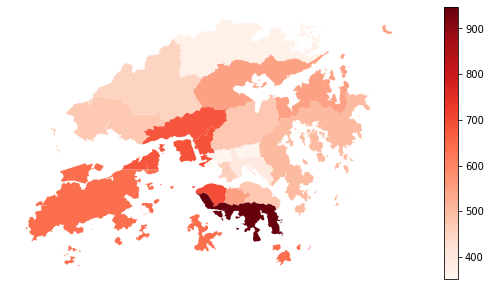

In [14]:
# Plotting the median price in each district
fig2, ax2 = plt.subplots(1, figsize=(12,5))
neighbour_map_data.plot(column='median_price', cmap='Reds', ax=ax2)
ax2.axis('off')
sm = plt.cm.ScalarMappable(cmap='Reds', norm=plt.Normalize(vmin=neighbour_map_data.median_price.min(), vmax=neighbour_map_data.median_price.max()))
sm._A = [] # Creates an empty array for the data range
cbar = fig2.colorbar(sm)
plt.show()

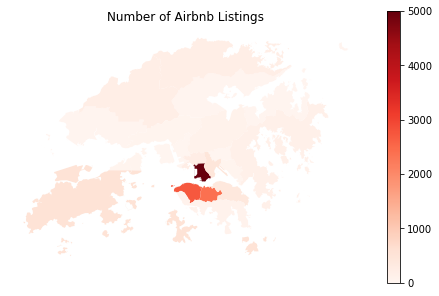

In [15]:
# Plotting the number of listings in each district
fig1, ax1 = plt.subplots(1, 1, figsize=(8,5))
neighbour_map_data.plot(column='number_of_listings', cmap='Reds', ax=ax1)
ax1.axis('off')
ax1.set_title('Number of Airbnb Listings')
sm = plt.cm.ScalarMappable(cmap='Reds', norm=plt.Normalize(vmin=0, vmax=5000))
sm._A = [] # Creates an empty array for the data range
cbar = fig1.colorbar(sm)
plt.show()

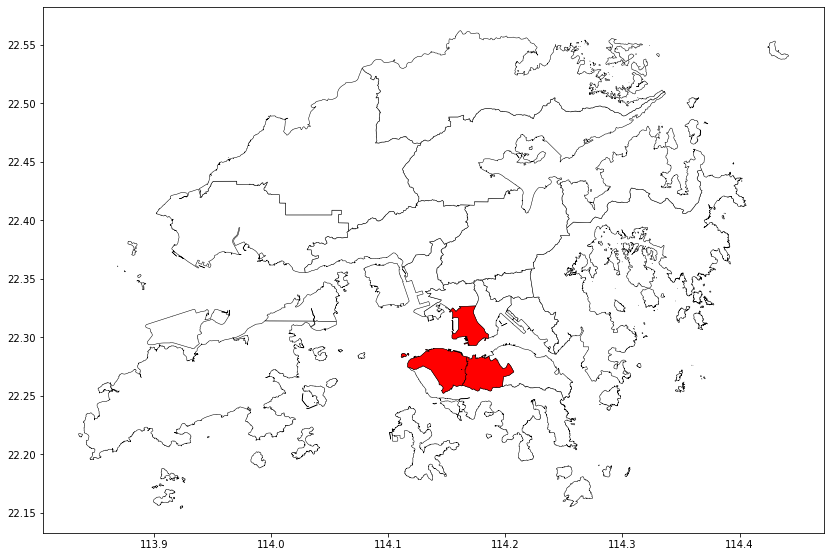

In [16]:
# Obtain the index of the target districts
top3 = data.groupby("neighbourhood").price.count().sort_values(ascending=False).head(3).index
top3 = top3.tolist()
# Extract the corresponding rows
top3 = neighbour_map_data.loc[top3]
# And then, plot out the their shape 
base = neighbour_map_data.plot(figsize=(14, 12), color = 'white', edgecolor='black', linewidth = 0.5)
top3.plot(ax = base, color='r', edgecolor='black', linewidth = 0.5 )

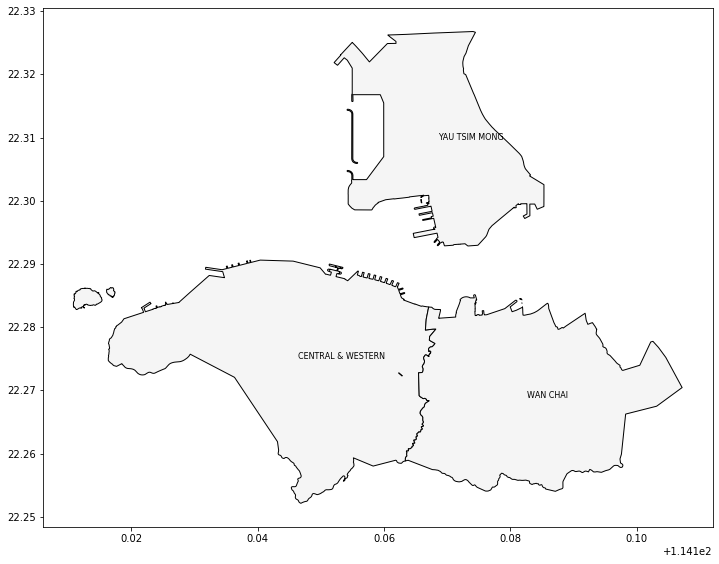

In [17]:
top3["center"] = top3["geometry"].centroid
top3_points = top3.copy()
top3_points.set_geometry("center", inplace = True)
map_top3 = top3.plot(figsize=(12,10), color = 'whitesmoke', edgecolor='black', linewidth = 1, legend = True)
texts = []
for x, y, label in zip(top3_points.geometry.x, top3_points.geometry.y, top3_points.index):
    texts.append(plt.text(x, y, label, fontsize = 8))

It is a good operation and essential for us to export the data we have extracted from raw data.

In [18]:
# top3.to_file('top3.shp')